In [1]:
## Follow the Guide to set up the connection
## https://cloud.google.com/bigquery/docs/visualize-jupyter

In [2]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="../MelbDatathon2018/Auth/Republic of Data 2018-3f4dcd98a279.json"

def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

%matplotlib inline

In [3]:
# Run this to test the connection
implicit()

[<Bucket: dataprep-staging-abb5d66a-134b-4c90-9774-b91f26c0f3f6>, <Bucket: republic-of-data-original-data>]


In [4]:
%load_ext google.cloud.bigquery

In [5]:
%%bigquery df_count
SELECT EXTRACT(YEAR FROM datetime) AS Year, COUNT(DISTINCT CardID) AS Count FROM `republic-of-data-2018.data.samp_0_scan_off`
GROUP BY EXTRACT(YEAR FROM datetime)

,Year,Count
0,2015,450475
1,2016,698651
2,2017,725368
3,2018,539306


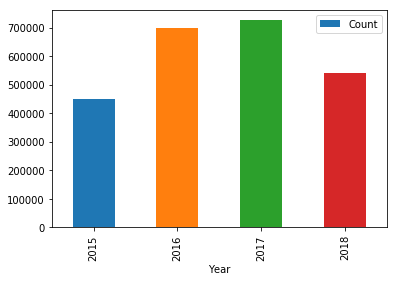

In [6]:
df_count.plot(kind='bar', x='Year', y='Count');

### Connect with Pandas

In [7]:
import pandas as pd
print(pd.__version__)

0.23.0


In [8]:
query = """
SELECT 'StopID' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE StopID IS NULL
UNION ALL 
SELECT 'StopLocationID' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE StopLocationID IS NULL
UNION ALL 
SELECT 'CardType' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE CardType IS NULL
UNION ALL 
SELECT 'Card_SubType_ID' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE Card_SubType_ID IS NULL
UNION ALL 
SELECT 'Mode' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE Mode IS NULL
UNION ALL 
SELECT 'BusinessDate' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE BusinessDate IS NULL
UNION ALL 
SELECT 'DateTime' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE DateTime IS NULL
UNION ALL 
SELECT 'CardID' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE CardID IS NULL
UNION ALL 
SELECT 'VehicleID' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE VehicleID IS NULL
UNION ALL 
SELECT 'ParentRoute' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE ParentRoute IS NULL
UNION ALL 
SELECT 'RouteID' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE RouteID IS NULL
UNION ALL 
SELECT 'Card_SubType_Desc' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE Card_SubType_Desc IS NULL
UNION ALL 
SELECT 'StopNameShort' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE StopNameShort IS NULL
UNION ALL 
SELECT 'StopNameLong' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE StopNameLong IS NULL
UNION ALL 
SELECT 'StopType' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE StopType IS NULL
UNION ALL 
SELECT 'SuburbName' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE SuburbName IS NULL
UNION ALL 
SELECT 'PostCode' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE PostCode IS NULL
UNION ALL 
SELECT 'RegionName' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE RegionName IS NULL
UNION ALL 
SELECT 'LocalGovernmentArea' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE LocalGovernmentArea IS NULL
UNION ALL 
SELECT 'StatDivision' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE StatDivision IS NULL
UNION ALL 
SELECT 'GPSLat' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE GPSLat IS NULL
UNION ALL 
SELECT 'GPSLong' AS ColName, COUNT(*) AS NullCount
FROM `republic-of-data-2018.clean.scans_with_stop_location_and_card_type`
WHERE GPSLong IS NULL
"""

df = pd.read_gbq(query,
                 project_id='republic-of-data-2018',
                 private_key="../MelbDatathon2018/Auth/Republic of Data 2018-3f4dcd98a279.json",
                 dialect='standard'
                )

In [9]:
df

,ColName,NullCount
0,Card_SubType_Desc,0
1,StatDivision,0
2,StopID,0
3,CardID,0
4,StopLocationID,0
5,Mode,0
6,RouteID,0
7,RegionName,0
8,BusinessDate,0
9,StopNameLong,0
